In [ ]:
#Homework 3 - Omar Abdelgelil

In [ ]:
#Exercise 3 (P198 ch 5)
# Part a
# This approach involves randomly dividing the set of observations into K groups of equal size. The first fold is treated as 
# a validation set and the method is fit on the remaining k-1 folds.

#part B
# (i)
# K-fold CV has less variance but more bias
#(ii)
# K-fold CV has more variance but less bias

In [ ]:
#Exercise 8(P200 ch 5)
#Part a
set.seed(1)
x <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)
y <- rnorm(100) 

#In this dataset, n is 100 observations
# P is equal to 2 features
#The model equation used:  Y <- X - 2X^2 





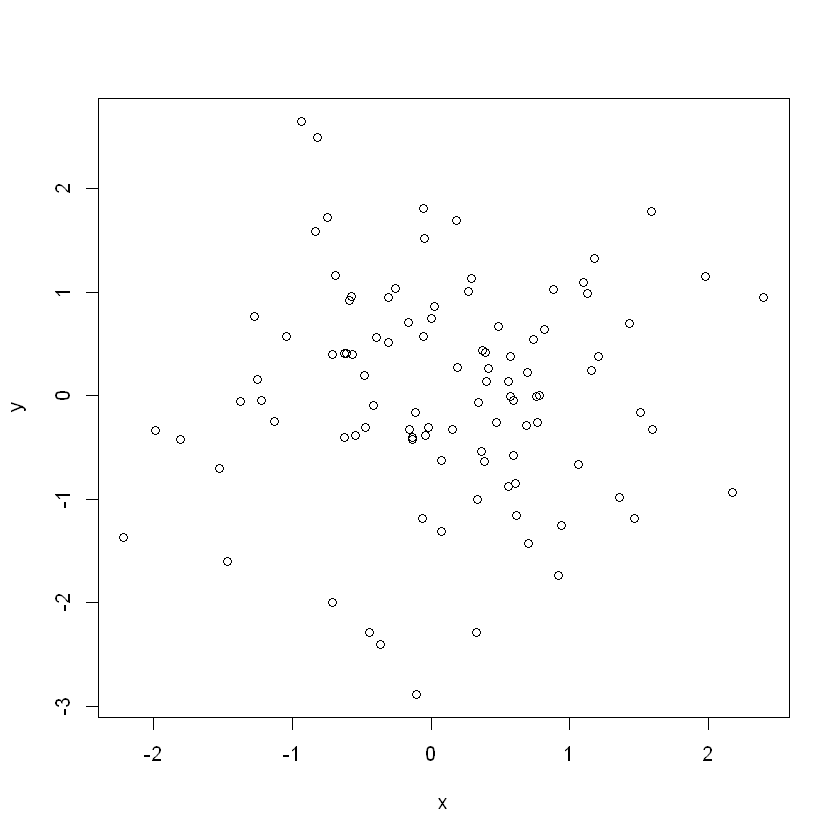

In [5]:
#Part b
plot(x, y)
#seems like the relation is quadratic 

In [8]:
#part c
# i
library(boot)
set.seed(1)
df <- data.frame(y, x, x2=x^2, x3=x^3, x4=x^4)
fit1 <- glm(y ~ x, data=df)
cv.err1 <- cv.glm(df, fit1)
cv.err1$delta

#ii
fit2 <- glm(y ~ x + x2, data=df)
cv.err2 <- cv.glm(df, fit2)
cv.err2$delta

#iii
fit3 <- glm(y ~ x + x2 + x3, data=df)
cv.err3 <- cv.glm(df, fit3)
cv.err3$delta

#iv
fit4 <- glm(y ~ x + x2 + x3 + x4, data=df)
cv.err4 <- cv.glm(df, fit4)
cv.err4$delta

[1] 1.102260 1.102039

[1] 1.128194 1.127826

[1] 1.084727 1.084337

[1] 1.097829 1.097252

In [9]:
#part d
#i
set.seed(2)
df <- data.frame(y, x, x2=x^2, x3=x^3, x4=x^4)
fit1 <- glm(y ~ x, data=df)
cv.err1 <- cv.glm(df, fit1)
cv.err1$delta

#ii
fit2 <- glm(y ~ x + x2, data=df)
cv.err2 <- cv.glm(df, fit2)
cv.err2$delta

#iii
fit3 <- glm(y ~ x + x2 + x3, data=df)
cv.err3 <- cv.glm(df, fit3)
cv.err3$delta

#iv
fit4 <- glm(y ~ x + x2 + x3 + x4, data=df)
cv.err4 <- cv.glm(df, fit4)
cv.err4$delta

# The results are the same because with LOOCV no randomness is involved

[1] 1.102260 1.102039

[1] 1.128194 1.127826

[1] 1.084727 1.084337

[1] 1.097829 1.097252

In [ ]:
#part e
#since the model is generated using a quadratic formula, then i and ii had the lowest


In [10]:
#part f
fit0 <- lm(y ~ poly(x,4))
summary(fit0)

#based on the results,only i and ii are signifcant predictors


Call:
lm(formula = y ~ poly(x, 4))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9153 -0.5277  0.1137  0.6562  2.3045 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.02967    0.10232   0.290   0.7725  
poly(x, 4)1  0.18917    1.02324   0.185   0.8537  
poly(x, 4)2 -0.19594    1.02324  -0.191   0.8485  
poly(x, 4)3  2.18389    1.02324   2.134   0.0354 *
poly(x, 4)4 -1.26129    1.02324  -1.233   0.2207  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.023 on 95 degrees of freedom
Multiple R-squared:  0.06076,	Adjusted R-squared:  0.02121 
F-statistic: 1.536 on 4 and 95 DF,  p-value: 0.1979


In [ ]:
#Exercise 1 (P259, chap6)
#part a
#Best subset will have the smallest training RSS because best subset will try every model that forward and backward selection 
#will try.

In [ ]:
#part b
#could be any of the three depending on the p and n numbers

In [ ]:
#part c
#(i)- True
#(ii)- True
#(iii)- False
#(iv)- False
#(v)-False

In [11]:
#Exercise 9(P263, chapter 6)
#part a
require(ISLR)
data(College)
set.seed(1)
trainid <- sample(1:nrow(College), nrow(College)/2)
train <- College[trainid,]
test <- College[-trainid,]
str(College)

Loading required package: ISLR
Warning message:
"package 'ISLR' was built under R version 3.6.2"

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [12]:
#part b
fit.lm <- lm(Apps~., data=train)
pred.lm <- predict(fit.lm, test)
err.lm <- mean((test$Apps - pred.lm)^2)

In [13]:
#part c
require(glmnet)
xmat.train <- model.matrix(Apps~., data=train)[,-1]
xmat.test <- model.matrix(Apps~., data=test)[,-1]
fit.ridge <- cv.glmnet(xmat.train, train$Apps, alpha=0)
(lambda <- fit.ridge$lambda.min)  # optimal lambda
pred.ridge <- predict(fit.ridge, s=lambda, newx=xmat.test)
(err.ridge <- mean((test$Apps - pred.ridge)^2)) 

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



[1] 445.4093

[1] 981782.5

In [14]:
#part d
require(glmnet)
xmat.train <- model.matrix(Apps~., data=train)[,-1]
xmat.test <- model.matrix(Apps~., data=test)[,-1]
fit.lasso <- cv.glmnet(xmat.train, train$Apps, alpha=1)
(lambda <- fit.lasso$lambda.min)  
pred.lasso <- predict(fit.lasso, s=lambda, newx=xmat.test)
err.lasso <- mean((test$Apps - pred.lasso)^2)  
coef.lasso <- predict(fit.lasso, type="coefficients", s=lambda)[1:ncol(College),]
coef.lasso[coef.lasso != 0]
length(coef.lasso[coef.lasso != 0])

[1] 2.377015

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-7.630822e+02 -3.134685e+02  1.760165e+00 -1.294842e+00  6.451066e+01 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
-2.056419e+01  6.792335e-02  1.277449e-02 -1.042580e-01  2.082218e-01 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 2.925466e-01  3.400861e-03 -1.437022e+01  5.195572e+00  2.149323e+01 
  perc.alumni        Expend     Grad.Rate 
 3.898054e-01  4.815260e-02  6.949196e+00

[1] 18

In [20]:
#part e
require(pls)
set.seed(1)
fit.pcr <- pcr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(fit.pcr, val.type="MSEP")
summary(fit.pcr)
pred.pcr <- predict(fit.pcr, test, ncomp=16)  # min Cv at M=16
(err.pcr <- mean((test$Apps - pred.pcr)^2))

Loading required package: pls
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'pls'"

ERROR: Error in pcr(Apps ~ ., data = train, scale = TRUE, validation = "CV"): could not find function "pcr"


In [21]:
#part f
require(pls)
set.seed(1)
fit.pls <- plsr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(fit.pls, val.type="MSEP")
summary(fit.pls)
pred.pls <- predict(fit.pls, test, ncomp=10)  # min Cv at M=10
(err.pls <- mean((test$Apps - pred.pls)^2))

Loading required package: pls
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'pls'"

ERROR: Error in plsr(Apps ~ ., data = train, scale = TRUE, validation = "CV"): could not find function "plsr"


Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.2"


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


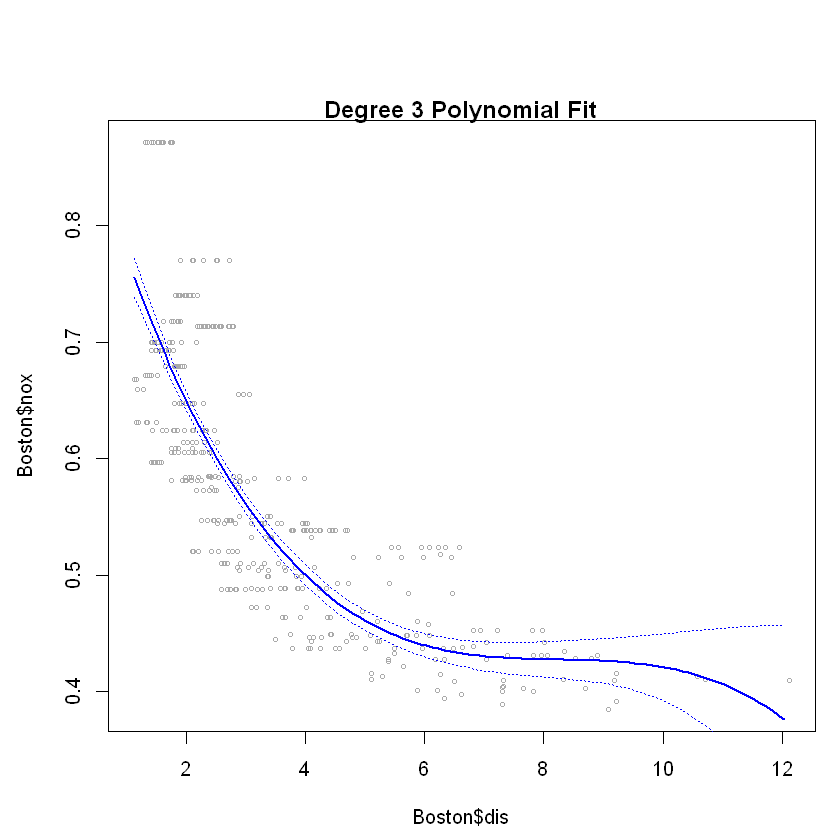

In [22]:
# Exercise 9 (P299, Chap7)
#part a
require(MASS)
data(Boston)
set.seed(1)
fit.03 <- lm(nox~poly(dis,3), data=Boston)
dislims <- range(Boston$dis)
dis.grid <- seq(dislims[1], dislims[2], 0.1)
preds <- predict(fit.03, newdata=list(dis=dis.grid), se=TRUE)
se.bands <- preds$fit + cbind(2*preds$se.fit, -2*preds$se.fit)
par(mfrow=c(1,1), mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(Boston$dis, Boston$nox, xlim=dislims, cex=0.5, col="darkgrey")
title("Degree 3 Polynomial Fit")
lines(dis.grid, preds$fit, lwd=2, col="blue")
matlines(dis.grid, se.bands, lwd=1, col="blue", lty=3)
summary(fit.03)

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

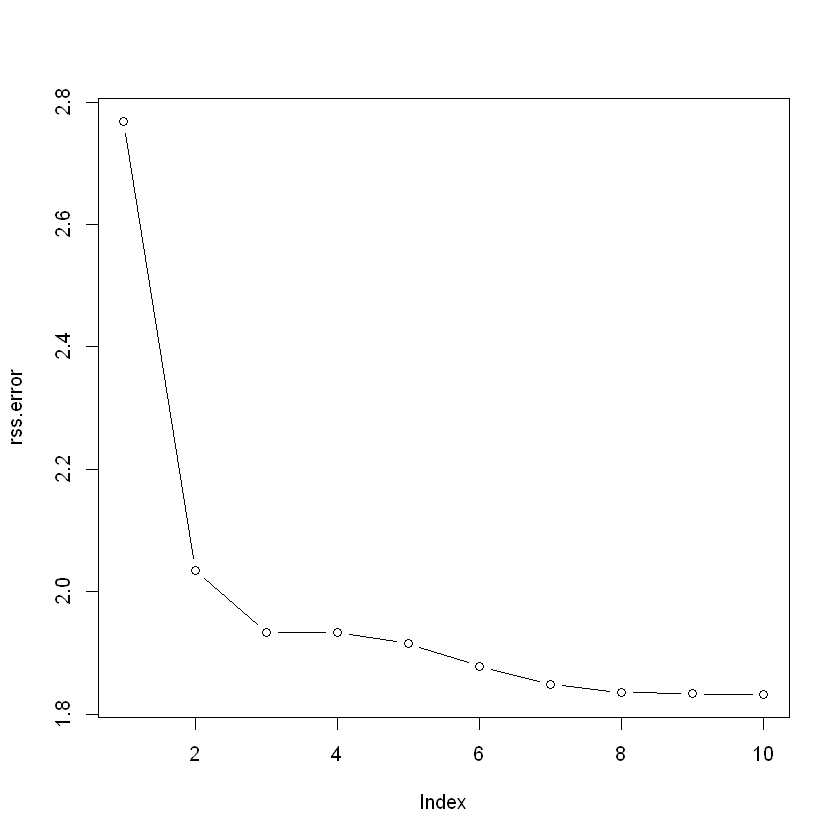

In [23]:
#part b 
rss.error <- rep(0,10)
for (i in 1:10) {

  lm.fit <- lm(nox~poly(dis,i), data=Boston)

  rss.error[i] <- sum(lm.fit$residuals^2)

}

rss.error
plot(rss.error, type="b")

[1] 0.005558263 0.004085706 0.003876521 0.003863342 0.004237452 0.005686862
 [7] 0.010278897 0.006810868 0.033308607 0.004075599

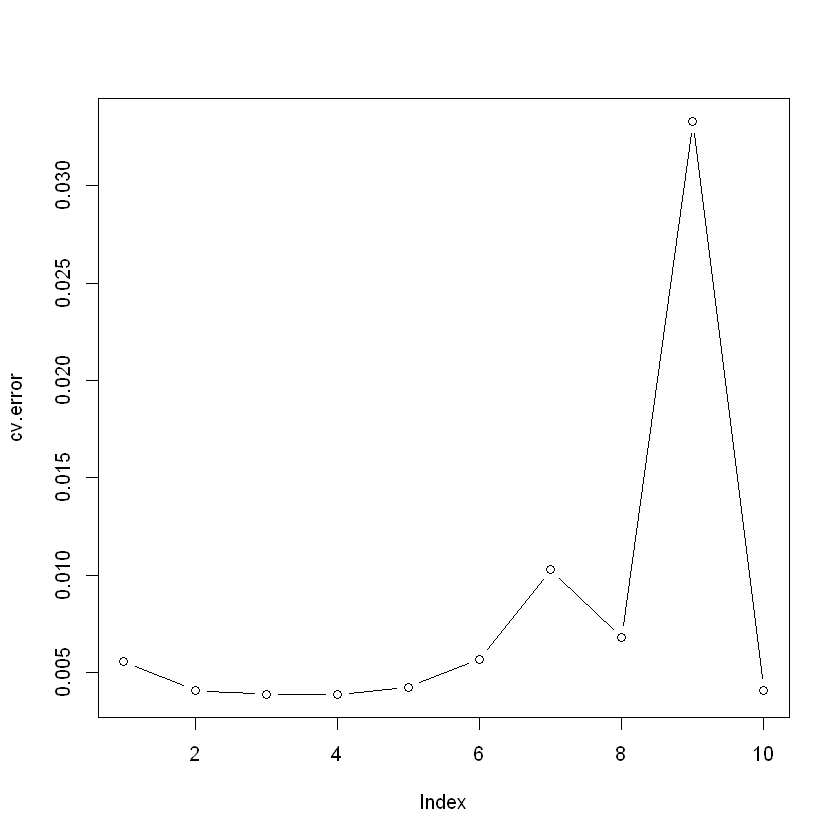

In [24]:
#part c
require(boot)

set.seed(1)

cv.error <- rep(0,10)

for (i in 1:10) {

  glm.fit <- glm(nox~poly(dis,i), data=Boston)

  cv.error[i] <- cv.glm(Boston, glm.fit, K=10)$delta[1]  # [1]:std, [2]:bias-corrected

}

cv.error

plot(cv.error, type="b")

Loading required package: splines


50% 
3.20745

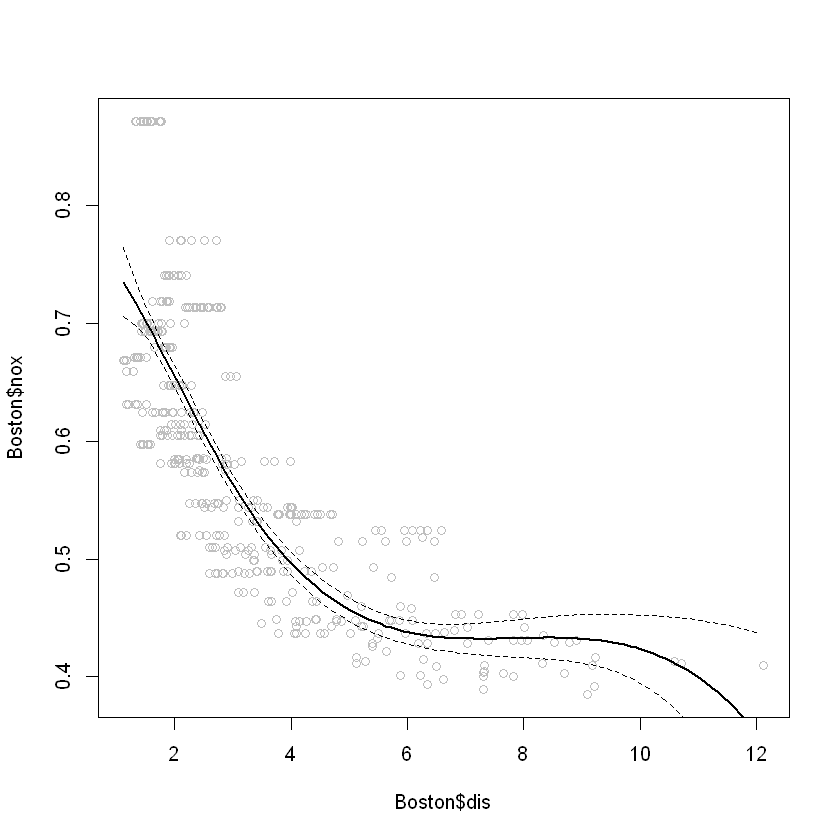

In [25]:
#part d
require(splines)

fit.sp <- lm(nox~bs(dis, df=4), data=Boston)

pred <- predict(fit.sp, newdata=list(dis=dis.grid), se=T)

plot(Boston$dis, Boston$nox, col="gray")

lines(dis.grid, pred$fit, lwd=2)

lines(dis.grid, pred$fit+2*pred$se, lty="dashed")

lines(dis.grid, pred$fit-2*pred$se, lty="dashed")

attr(bs(Boston$dis,df=4),"knots")

[1] 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535

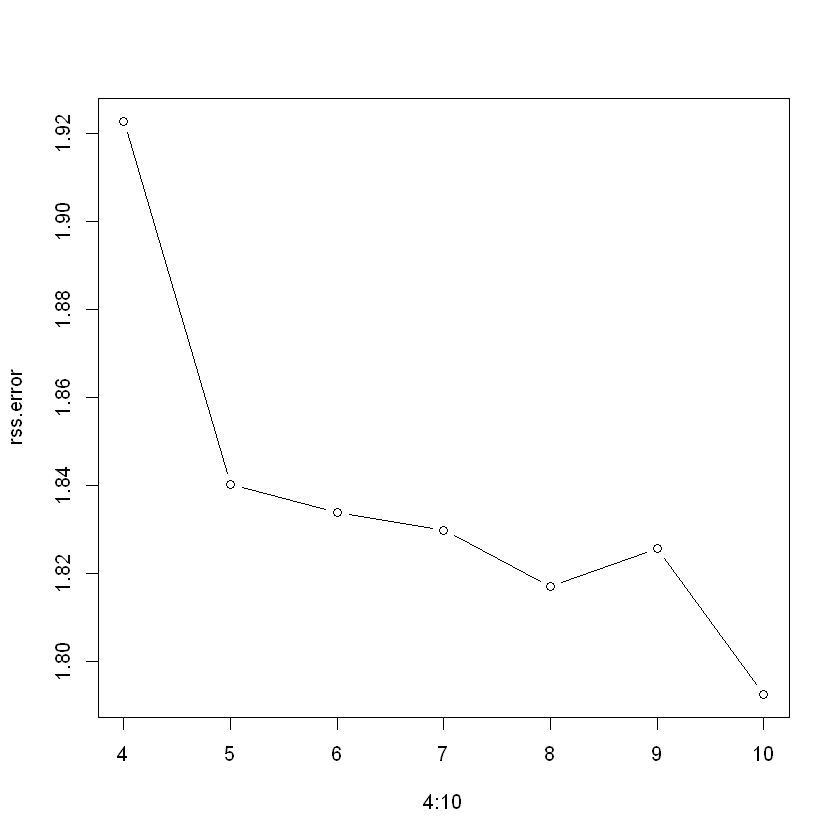

In [26]:
#part e
require(splines)

set.seed(1)

rss.error <- rep(0,7)

for (i in 4:10) {

  fit.sp <- lm(nox~bs(dis, df=i), data=Boston)

  rss.error[i-3] <- sum(fit.sp$residuals^2)

}

rss.error

plot(4:10, rss.error, type="b")

Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.23925), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.23925), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.35953333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.35953333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(

[1] 0.003918838 0.003729024 0.003722683 0.003696789 0.003746270 0.003742534
[7] 0.003720942

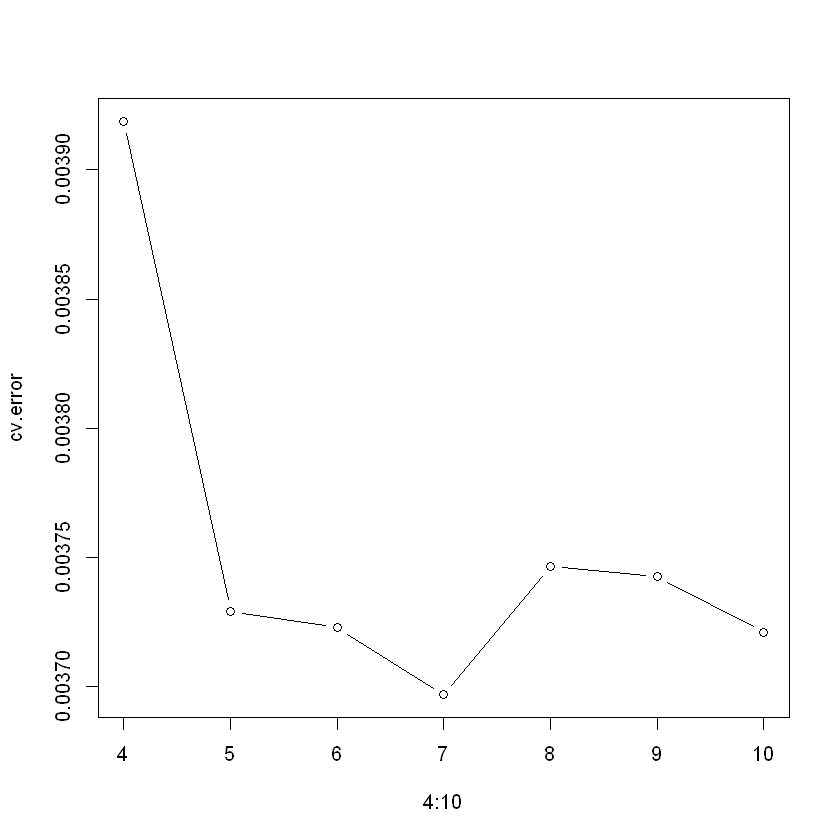

In [27]:
#part f
require(splines)

require(boot)

set.seed(1)

cv.error <- rep(0,7)

for (i in 4:10) {

  glm.fit <- glm(nox~bs(dis, df=i), data=Boston)

  cv.error[i-3] <- cv.glm(Boston, glm.fit, K=10)$delta[1]

}

cv.error

plot(4:10, cv.error, type="b")

In [28]:
#exercise 10 (P300, Chap.7) 
#part a
require(ISLR)

require(leaps)

data(College)

set.seed(1)



# split data into train and test sets

trainid <- sample(1:nrow(College), nrow(College)/2)

train <- College[trainid,]

test <- College[-trainid,]



# predict function from chapter 6 labs

predict.regsubsets <- function(object, newdata, id, ...){

  form <- as.formula(object$call[[2]])

  mat <- model.matrix(form, newdata)

  coefi <- coef(object, id=id)

  xvars <- names(coefi)

  mat[,xvars]%*%coefi

}



# forward selection

fit.fwd <- regsubsets(Outstate~., data=train, nvmax=ncol(College)-1)

(fwd.summary <- summary(fit.fwd))



err.fwd <- rep(NA, ncol(College)-1)

for(i in 1:(ncol(College)-1)) {

  pred.fwd <- predict(fit.fwd, test, id=i)

  err.fwd[i] <- mean((test$Outstate - pred.fwd)^2)

}

par(mfrow=c(2,2))

plot(err.fwd, type="b", main="Test MSE", xlab="Number of Predictors")

min.mse <- which.min(err.fwd)  

points(min.mse, err.fwd[min.mse], col="red", pch=4, lwd=5)

plot(fwd.summary$adjr2, type="b", main="Adjusted R^2", xlab="Number of Predictors")

max.adjr2 <- which.max(fwd.summary$adjr2)  

points(max.adjr2, fwd.summary$adjr2[max.adjr2], col="red", pch=4, lwd=5)

plot(fwd.summary$cp, type="b", main="cp", xlab="Number of Predictors")

min.cp <- which.min(fwd.summary$cp)  

points(min.cp, fwd.summary$cp[min.cp], col="red", pch=4, lwd=5)

plot(fwd.summary$bic, type="b", main="bic", xlab="Number of Predictors")

min.bic <- which.min(fwd.summary$bic)  

points(min.bic, fwd.summary$bic[min.bic], col="red", pch=4, lwd=5)

# model metrics do not improve much after 6 predictors

coef(fit.fwd, 6)

Loading required package: leaps
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'leaps'"

ERROR: Error in regsubsets(Outstate ~ ., data = train, nvmax = ncol(College) - : could not find function "regsubsets"


In [29]:
#part b
require(gam)

gam.fit <- gam(Outstate ~ 

                 Private +   # categorical variable

                 s(Room.Board,3) + 

                 s(Terminal,3) + 

                 s(perc.alumni,3) + 

                 s(Expend,3) + 

                 s(Grad.Rate,3), 

               data=College)

par(mfrow=c(2,3))

plot(gam.fit, se=TRUE, col="blue")

Loading required package: gam
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'gam'"

ERROR: Error in gam(Outstate ~ Private + s(Room.Board, 3) + s(Terminal, 3) + : could not find function "gam"


In [30]:
#part c
pred <- predict(gam.fit, test)

(mse.error <- mean((test$Outstate - pred)^2))

err.fwd[6]

ERROR: Error in predict(gam.fit, test): object 'gam.fit' not found


In [ ]:
#part d
#Strong evidence of non-linear effects for `Expend`, some evidence for `Room.Board`,
#`Terminal` and `Grad.Rate`, and no evidence for `perc.alumni`.